#### Для простой однородной пластины

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import copy
a = 0
b = 1
h = 0.01
e = 0.001
N = int((b-a)/h)
V0 = []

for i in range (N):
    V0.append([])
    for j in range (N):
        V0[i].append(0)

def Output(A):
    for i in range (len(A)):
        print(A[i])
    return 
        
Output(V0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [2]:
def NormE(A):
    N = len(A)
    S = 0
    for i in range (N):
        for j in range(N):
            S += (A[i][j])**2
    return np.sqrt(S)

def Dif(A, B):
    N = len(A)
    Res = []
    for i in range (N):
        Res.append([])
        for j in range (N):
            Res[i].append(A[i][j] - B[i][j])
    return Res

def DNormE(V1, V2):
    D = Dif(V1, V2)
    return NormE(D)
    
def f(x, y):
    return -2*(np.pi)**2*np.sin(np.pi*x)*np.sin(np.pi*y)

def Seidel(V, h, e):
    global a, b
    N = int((b-a)/h)
    x = np.linspace(a,b,N)
    
    y = np.linspace(a,b,N)
    
    V1 = copy.deepcopy(V)
    N = len(V1)
    V2 = copy.deepcopy(V)
    for i in range(1, N-1):
        for j in range(1, N-1):
            V2[i][j] = (1/4*(V1[i-1][j] + V1[i+1][j] + V1[i][j-1] + V1[i][j+1]) - (h**2/4)*f(x[i], y[j]))
    #while (DNormE(V1, V2) > e) and (h>e):
    while DNormE(V1, V2) > e:
        V1 = copy.deepcopy(V2)
        for i in range(1, N-1):
            for j in range(1, N-1):
                pass
                V2[i][j] = (1/4*(V2[i-1][j] + V1[i+1][j] + V2[i][j-1] + V1[i][j+1]) - (h**2/4)*f(x[i], y[j]))
    print("Точность метода 1: ", DNormE(V1, V2))
    return np.array(V2), N

def SeidelN(V, h, e, n):
    global a, b
    N = int((b-a)/h)
    x = np.linspace(a,b,N)
    y = np.linspace(a,b,N)
    V1 = copy.deepcopy(V)
    N = len(V1)
    V2 = copy.deepcopy(V)
    for i in range(1, N-1):
        for j in range(1, N-1):
            V2[i][j] = (1/4*(V1[i-1][j] + V1[i+1][j] + V1[i][j-1] + V1[i][j+1]) - (h**2/4)*f(x[i], y[j]))
    for i in range(n):
        V1 = copy.deepcopy(V2)
        for i in range(1, N-1):
            for j in range(1, N-1):
                V2[i][j] = (1/4*(V2[i-1][j] + V1[i+1][j] + V2[i][j-1] + V1[i][j+1]) - (h**2/4)*f(x[i], y[j]))
    print("Точность метода 2: ", DNormE(V1, V2))
    return np.array(V2), N



In [3]:
V_ans, N1 = Seidel(V0, h, e)
x1 = np.linspace(a,b,N1)
y1 = np.linspace(a,b,N1)
#print("N = ", x1)
#Output(V_ans)
V_ansN, N2 = SeidelN(V0, h, e, 100)
x2 = np.linspace(a,b,N2)
y2 = np.linspace(a,b,N2)
print("Точность решения между двумя методами: ", DNormE(V_ans, V_ansN))
#Output(V_ansN)

Точность метода 1:  0.0009999045712422389
Точность метода 2:  0.0441680078858038
Точность решения между двумя методами:  42.858890838320754


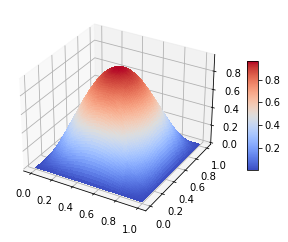

In [4]:
#fig, axs = plt.subplots(1, 1, figsize = (20, 15))

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 1, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo

#x1, y1 = np.meshgrid(x1, y1)

x1, y1 = np.meshgrid(x1,y1)
surf = ax.plot_surface(x1, y1, V_ans, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.1, antialiased=False)

#ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

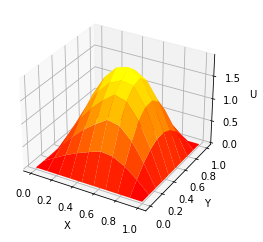

In [83]:
ax = plt.figure().add_subplot(projection='3d')

#x1, y1 = np.mgrid[0:6np.pi:0.25, 0:4np.pi:0.25]
#Z = np.sqrt(np.abs(np.cos(0.1X) + np.cos(0.1Y)))

#x1, y1 = np.meshgrid(x1,y1)
ax.plot_surface(x1 , y1 , V_ans, cmap='autumn', cstride=1, rstride=1)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("U")


plt.show()

#### Зададим уравнение границы:

\begin{cases}
    y = 0.5, x \in [0, \frac{1}{3}]\\
    y = x + \frac{1}{6}, x \in [\frac{1}{3}, \frac{1}{2}]\\
    y = -x + \frac{1}{6}, x \in [\frac{1}{2}, \frac{2}{3}]\\
    y = 0.5, x \in [\frac{2}{3}, 1]\\
\end{cases}

In [ ]:
def Ygran(x):
    if (x<=1/3) or (x>2/3):
        return 0.5
    elif (1/3<x) and (x<=1/2) :
        return x+1/6
    elif (1/2<x) and (x<=2/3) :
        return -x+1/6
def F(x, y):
    if (y<=Ygran(x)):
        return -2*(np.pi)**2*np.sin(np.pi*x)*np.sin(np.pi*y)
    else:
        return (-2*(np.pi)**2*np.sin(2*np.pi*x)*np.sin(2*np.pi*y))
        
    
def Seidel2(V, h, e):
    global a, b
    N = int((b-a)/h)
    x = np.linspace(a,b,N)
    y = np.linspace(a,b,N)  
    V1 = copy.deepcopy(V)
    N = len(V1)
    V2 = copy.deepcopy(V)
    for i in range(1, N-1):
        for j in range(1, N-1):
            V2[i][j] = (1/4*(V1[i-1][j] + V1[i+1][j] + V1[i][j-1] + V1[i][j+1]) - (h**2/4)*F(x[i], y[j]))
    #while (DNormE(V1, V2) > e) and (h>e):
    while DNormE(V1, V2) > e:
        V1 = copy.deepcopy(V2)
        for i in range(1, N-1):
            for j in range(1, N-1):
                pass
                V2[i][j] = (1/4*(V2[i-1][j] + V1[i+1][j] + V2[i][j-1] + V1[i][j+1]) - (h**2/4)*F(x[i], y[j]))
    print("Точность метода 1: ", DNormE(V1, V2))
    return np.array(V2), N

V3, N3 = Seidel2(V0, h, e)

In [ ]:
#fig, axs = plt.subplots(1, 1, figsize = (20, 15))

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 1, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo

#x1, y1 = np.meshgrid(x1, y1)

#x1, y1 = np.meshgrid(x1,y1)
surf = ax.plot_surface(x1, y1, V3, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.1, antialiased=False)

#ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)